## Heart Disease Data Analysis

### Introduction
This analysis aims to prepare heart disease data for use in predictive modeling. The objective is to ensure the dataset is clean, well-structured, and ready for input into machine learning models. This involves various preprocessing tasks to enhance data quality and usability.

### About Me
Hi, I'm Khaled Ashraf, an AI engineer. I am currently working on analyzing heart disease data to make sure it's ready for modeling. This includes preparing the data to ensure accurate and reliable predictions.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
HeartDiseaseData =  pd.read_csv(r'/kaggle/input/heart-disease-data/heart_2020_cleaned.csv')
HeartDiseaseData.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
HeartDiseaseData.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [4]:
HeartDiseaseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
HeartDiseaseData.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


This code is used to detect outliers in the data. The detected outliers represent unusual values that might affect our analysis. In this case, these outliers correspond to specific medical conditions. If the client allows us to remove these outliers, we can use the IQR method to delete them.


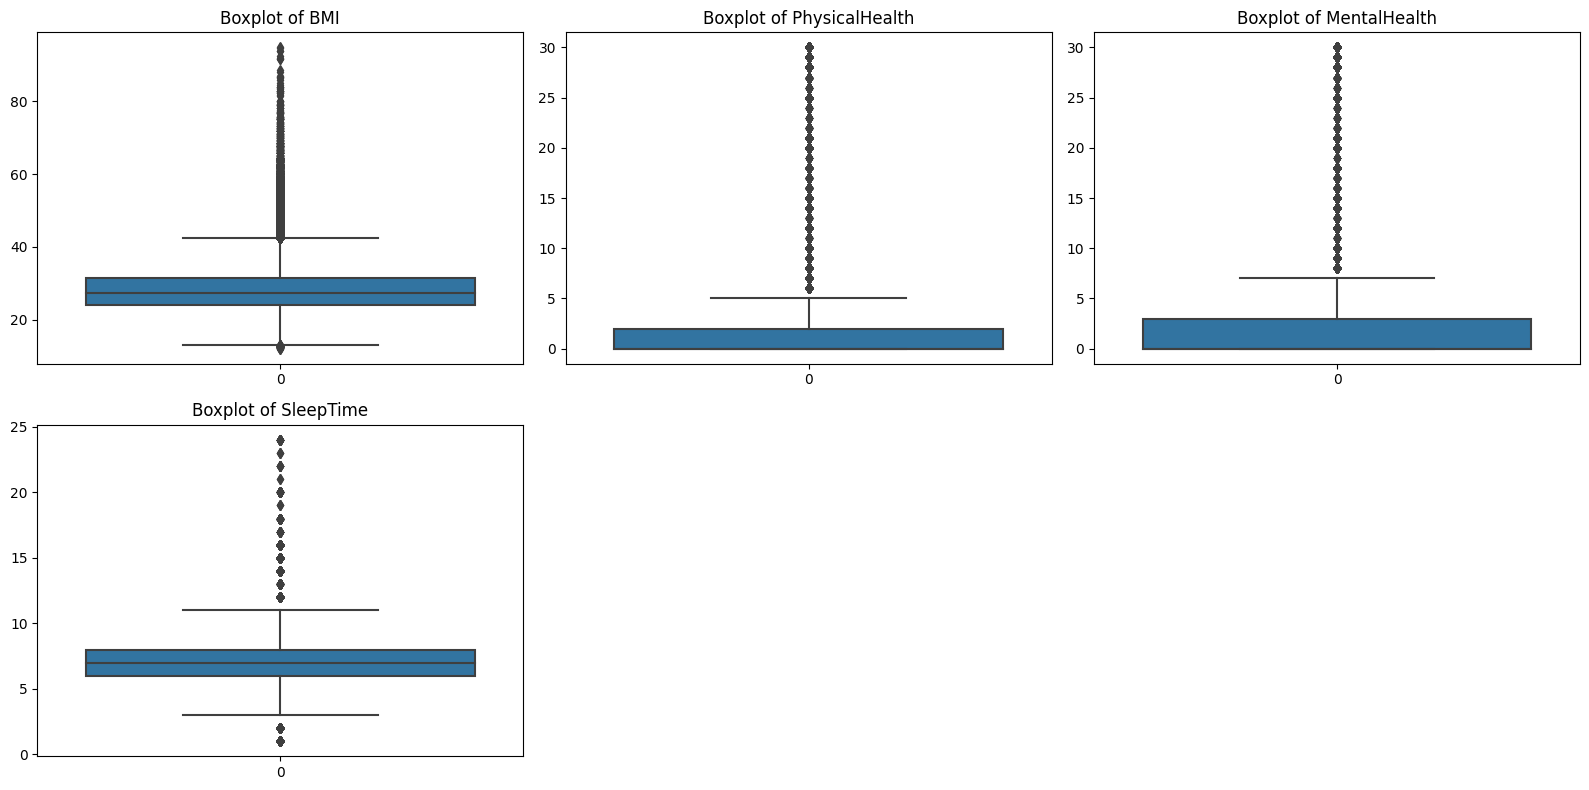

In [6]:
numeric_columns = HeartDiseaseData.select_dtypes(include=['float','int']).columns
plt.figure(figsize=(16,8))

for i,column in enumerate(numeric_columns,1):
    plt.subplot(2, len(numeric_columns)//2 + 1, i)
    sns.boxplot(HeartDiseaseData[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

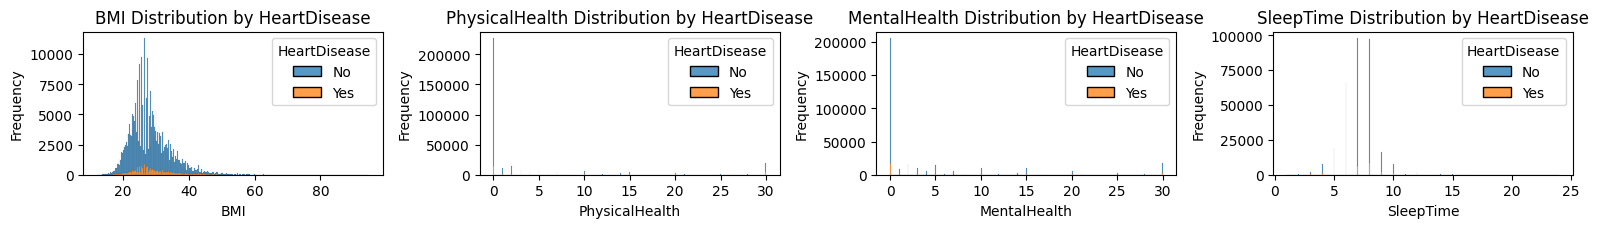

In [7]:


numeric_columns = HeartDiseaseData.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(16, 8))

for i, column in enumerate(numeric_columns):
    if column != 'HeartDisease': 
        plt.subplot(4, 4, i + 1) 
        sns.histplot(HeartDiseaseData, x=column, hue='HeartDisease', multiple='stack')
        plt.title(f'{column} Distribution by HeartDisease')
        plt.xlabel(column)
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [8]:
HeartDiseaseData.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

Smoking
No     187887
Yes    131908
Name: count, dtype: int64


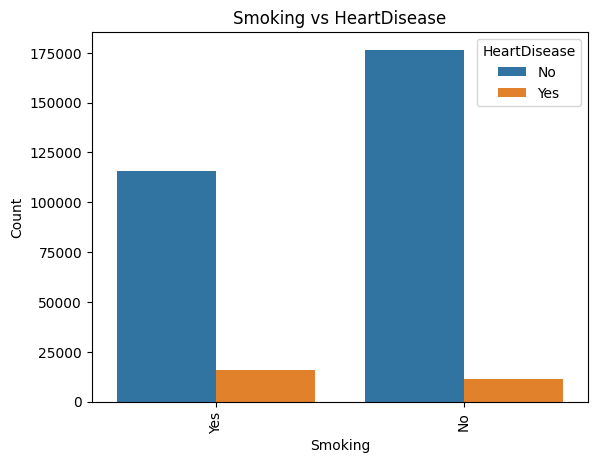

In [9]:

# احصل على القيم الفردية وعددها
value_counts = HeartDiseaseData["Smoking"].value_counts()

# عرض النتائج
print(value_counts)


sns.countplot(data=HeartDiseaseData, x="Smoking", hue='HeartDisease')
plt.title(f'{"Smoking"} vs HeartDisease')
plt.xlabel("Smoking")
plt.ylabel('Count')
plt.xticks(rotation=90)  # تدوير التسميات إذا كانت طويلة
plt.show()


AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64


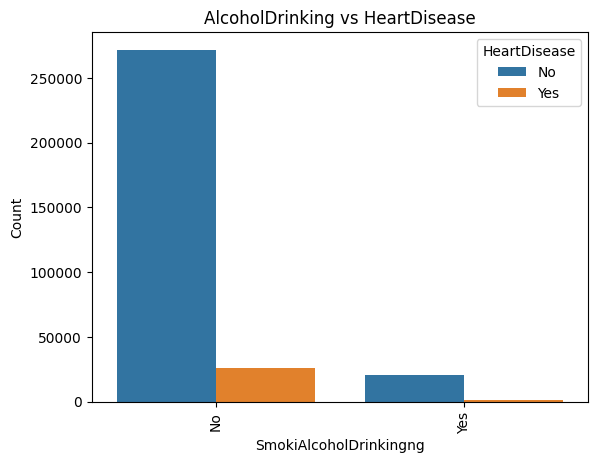

In [10]:
# احصل على القيم الفردية وعددها
value_counts = HeartDiseaseData["AlcoholDrinking"].value_counts()

# عرض النتائج
print(value_counts)


sns.countplot(data=HeartDiseaseData, x="AlcoholDrinking", hue='HeartDisease')
plt.title(f'{"AlcoholDrinking"} vs HeartDisease')
plt.xlabel("SmokiAlcoholDrinkingng")
plt.ylabel('Count')
plt.xticks(rotation=90)  # تدوير التسميات إذا كانت طويلة
plt.show()


Sex
Female    167805
Male      151990
Name: count, dtype: int64


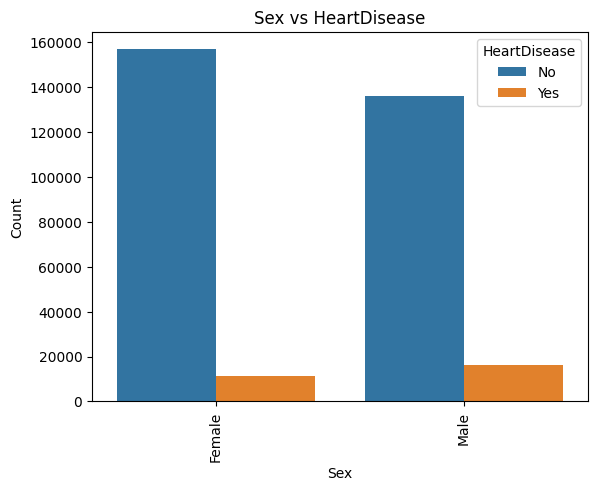

In [11]:
# احصل على القيم الفردية وعددها
value_counts = HeartDiseaseData["Sex"].value_counts()

# عرض النتائج
print(value_counts)


sns.countplot(data=HeartDiseaseData, x="Sex", hue='HeartDisease')
plt.title(f'{"Sex"} vs HeartDisease')
plt.xlabel("Sex")
plt.ylabel('Count')
plt.xticks(rotation=90)  # تدوير التسميات إذا كانت طويلة
plt.show()


SleepTime
7.0     97751
8.0     97602
6.0     66721
5.0     19184
9.0     16041
10.0     7796
4.0      7750
12.0     2205
3.0      1992
2.0       788
1.0       551
11.0      415
14.0      243
16.0      236
15.0      189
18.0      102
13.0       97
20.0       64
24.0       30
17.0       21
22.0        9
19.0        3
23.0        3
21.0        2
Name: count, dtype: int64


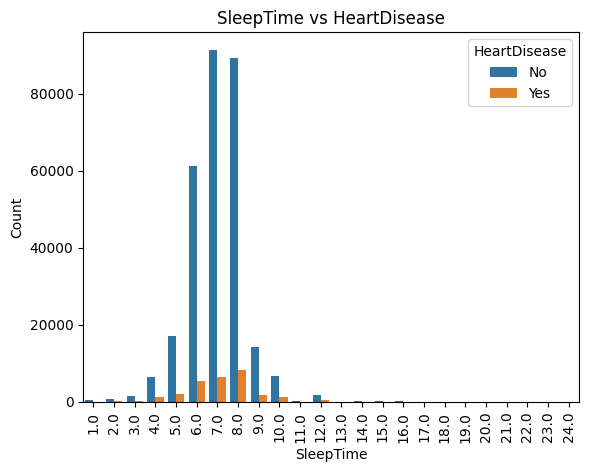

In [12]:
# احصل على القيم الفردية وعددها
value_counts = HeartDiseaseData["SleepTime"].value_counts()

# عرض النتائج
print(value_counts)


sns.countplot(data=HeartDiseaseData, x="SleepTime", hue='HeartDisease')
plt.title(f'{"SleepTime"} vs HeartDisease')
plt.xlabel("SleepTime")
plt.ylabel('Count')
plt.xticks(rotation=90)  # تدوير التسميات إذا كانت طويلة
plt.show()


Race
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: count, dtype: int64


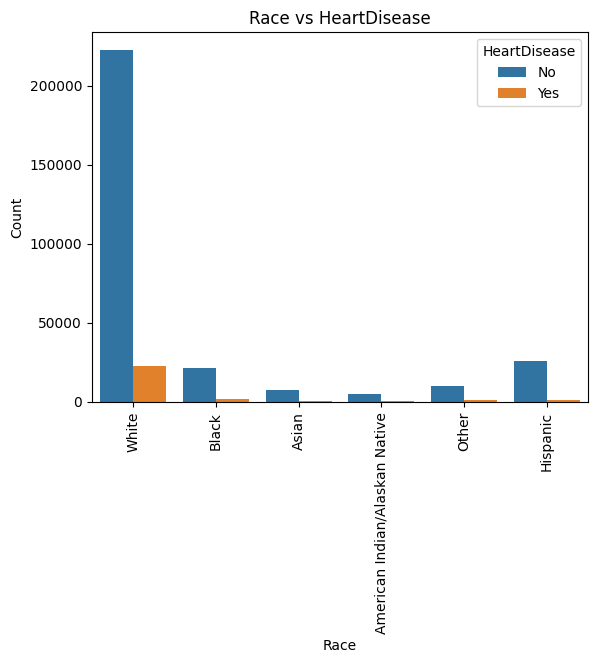

In [13]:

# احصل على القيم الفردية وعددها
value_counts = HeartDiseaseData["Race"].value_counts()

# عرض النتائج
print(value_counts)


sns.countplot(data=HeartDiseaseData, x="Race", hue='HeartDisease')
plt.title(f'{"Race"} vs HeartDisease')
plt.xlabel("Race")
plt.ylabel('Count')
plt.xticks(rotation=90)  # تدوير التسميات إذا كانت طويلة
plt.show()


AgeCategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: count, dtype: int64


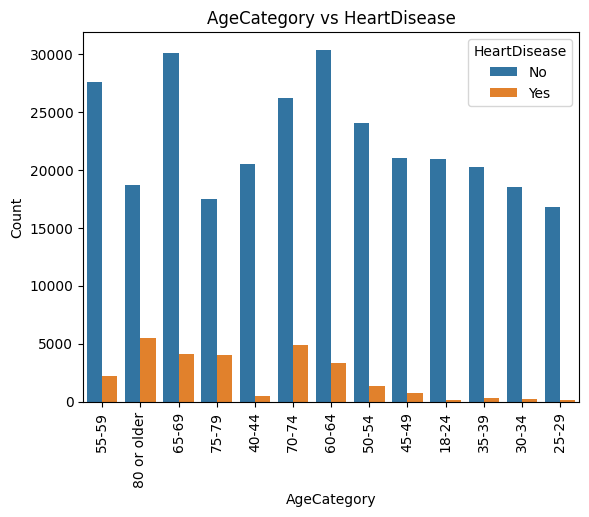

In [14]:


# احصل على القيم الفردية وعددها
value_counts = HeartDiseaseData["AgeCategory"].value_counts()

# عرض النتائج
print(value_counts)


sns.countplot(data=HeartDiseaseData, x="AgeCategory", hue='HeartDisease')
plt.title(f'{"AgeCategory"} vs HeartDisease')
plt.xlabel("AgeCategory")
plt.ylabel('Count')
plt.xticks(rotation=90)  # تدوير التسميات إذا كانت طويلة
plt.show()


Diabetic
No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: count, dtype: int64


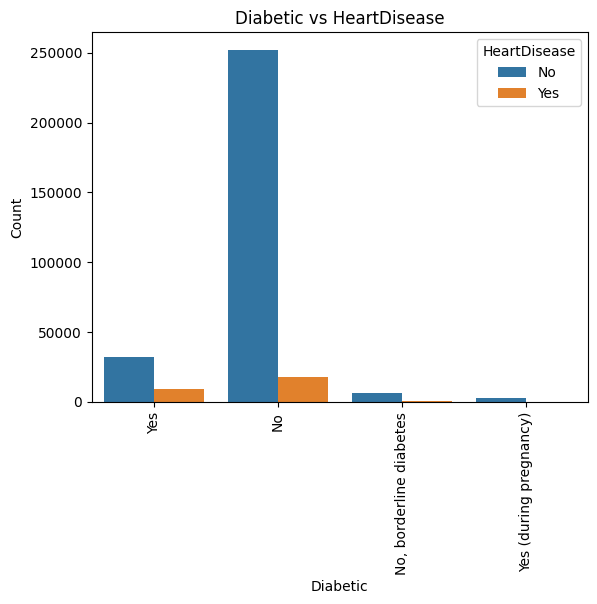

In [15]:


# احصل على القيم الفردية وعددها
value_counts = HeartDiseaseData["Diabetic"].value_counts()

# عرض النتائج
print(value_counts)


sns.countplot(data=HeartDiseaseData, x="Diabetic", hue='HeartDisease')
plt.title(f'{"Diabetic"} vs HeartDisease')
plt.xlabel("Diabetic")
plt.ylabel('Count')
plt.xticks(rotation=90)  # تدوير التسميات إذا كانت طويلة
plt.show()


SkinCancer
No     289976
Yes     29819
Name: count, dtype: int64


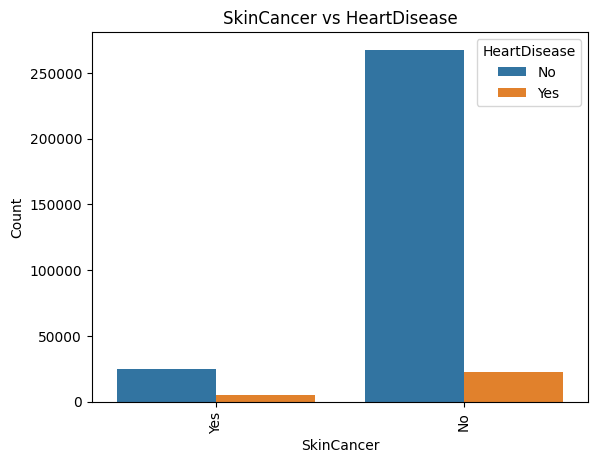

In [16]:


# احصل على القيم الفردية وعددها
value_counts = HeartDiseaseData["SkinCancer"].value_counts()

# عرض النتائج
print(value_counts)


sns.countplot(data=HeartDiseaseData, x="SkinCancer", hue='HeartDisease')
plt.title(f'{"SkinCancer"} vs HeartDisease')
plt.xlabel("SkinCancer")
plt.ylabel('Count')
plt.xticks(rotation=90)  # تدوير التسميات إذا كانت طويلة
plt.show()


GenHealth
Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: count, dtype: int64


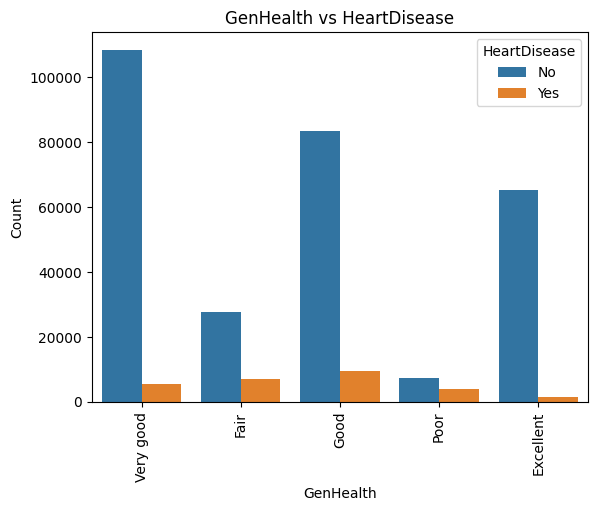

In [17]:

# احصل على القيم الفردية وعددها
value_counts = HeartDiseaseData["GenHealth"].value_counts()

# عرض النتائج
print(value_counts)


sns.countplot(data=HeartDiseaseData, x="GenHealth", hue='HeartDisease')
plt.title(f'{"GenHealth"} vs HeartDisease')
plt.xlabel("GenHealth")
plt.ylabel('Count')
plt.xticks(rotation=90)  # تدوير التسميات إذا كانت طويلة
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# افترض أن لديك DataFrame باسم HeartDiseaseData
# تحديد الأعمدة التي تحتاج إلى ترتيب والأعمدة التي لا تحتاج إلى ترتيب
ordinal_columns = ['AgeCategory', 'GenHealth']  # الأعمدة التي فيها ترتيب مهم
non_ordinal_columns = [col for col in HeartDiseaseData.columns if col not in ordinal_columns]  # الأعمدة التي ليس فيها ترتيب مهم

# تحويل الأعمدة غير المهمة
label_encoder = LabelEncoder()
HeartDiseaseData[non_ordinal_columns] = HeartDiseaseData[non_ordinal_columns].apply(lambda col: label_encoder.fit_transform(col))

# تحويل الأعمدة المهمة
# تحديد الترتيب المناسب للقيم في الأعمدة التي فيها ترتيب مهم
ordinal_encoder = OrdinalEncoder(categories=[
    ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'],
    ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
])

# تحويل الأعمدة باستخدام OrdinalEncoder
HeartDiseaseData[ordinal_columns] = ordinal_encoder.fit_transform(HeartDiseaseData[ordinal_columns])

# عرض البيانات بعد التعديلات
print(HeartDiseaseData.head())


   HeartDisease   BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0   223        1                0       0               3   
1             0   524        0                0       1               0   
2             0  1103        1                0       0              20   
3             0   883        0                0       0               0   
4             0   837        0                0       0              28   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0            30            0    0          7.0     5         2   
1             0            0    0         12.0     5         0   
2            30            0    1          9.0     5         2   
3             0            0    0         11.0     5         0   
4             0            1    0          4.0     5         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1        1.0          4       1              0         

In [19]:
HeartDiseaseData.head()
HeartDiseaseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  int64  
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  float64
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  float64
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [20]:
X = HeartDiseaseData.drop(columns=['HeartDisease'])
y = HeartDiseaseData['HeartDisease']

In [21]:
####model

## Heart Disease Prediction Streamlit App

This Streamlit app uses a pre-trained model to predict the likelihood of heart disease based on user inputs. The app allows users to input various health-related features, which are then used by the model to provide a prediction.


In [22]:
"""
import streamlit as st
import pandas as pd
import joblib

# تحميل النموذج المدرب
model = joblib.load(r'F:\projects\kaggle\Heart Disease Data.sav')  # تأكد من وضع المسار الصحيح للنموذج

# واجهة المستخدم
st.title('Heart Disease Prediction App')

# مدخلات المستخدم
bmi = st.number_input('BMI', min_value=0.0)
smoking = st.selectbox('Smoking', [0, 1])  # 0: No, 1: Yes
alcohol_drinking = st.selectbox('Alcohol Drinking', [0, 1])  # 0: No, 1: Yes
stroke = st.selectbox('Stroke', [0, 1])  # 0: No, 1: Yes
physical_health = st.number_input('Physical Health', min_value=0)
mental_health = st.number_input('Mental Health', min_value=0)
diff_walking = st.selectbox('Diff Walking', [0, 1])  # 0: No, 1: Yes
sex = st.selectbox('Sex', [0, 1])  # 0: Female, 1: Male
age_category = st.selectbox('Age Category', [0, 1, 2, 3, 4, 5])  # يجب تحديد الفئات
race = st.selectbox('Race', [0, 1, 2, 3, 4])  # يجب تحديد الفئات
diabetic = st.selectbox('Diabetic', [0, 1])  # 0: No, 1: Yes
physical_activity = st.selectbox('Physical Activity', [0, 1])  # 0: No, 1: Yes
gen_health = st.selectbox('General Health', [0, 1, 2, 3, 4])  # يجب تحديد الفئات
sleep_time = st.number_input('Sleep Time', min_value=0)
asthma = st.selectbox('Asthma', [0, 1])  # 0: No, 1: Yes
kidney_disease = st.selectbox('Kidney Disease', [0, 1])  # 0: No, 1: Yes
skin_cancer = st.selectbox('Skin Cancer', [0, 1])  # 0: No, 1: Yes

# تحضير البيانات للتنبؤ
input_features = {
    'BMI': bmi,
    'Smoking': smoking,
    'AlcoholDrinking': alcohol_drinking,
    'Stroke': stroke,
    'PhysicalHealth': physical_health,
    'MentalHealth': mental_health,
    'DiffWalking': diff_walking,
    'Sex': sex,
    'AgeCategory': age_category,
    'Race': race,
    'Diabetic': diabetic,
    'PhysicalActivity': physical_activity,
    'GenHealth': gen_health,
    'SleepTime': sleep_time,
    'Asthma': asthma,
    'KidneyDisease': kidney_disease,
    'SkinCancer': skin_cancer
}

# تحويل القيم إلى DataFrame
input_df = pd.DataFrame([input_features])

# التنبؤ
if st.button('Predict'):
    prediction = model.predict(input_df)
    st.write('Prediction:', 'Heart Disease' if prediction[0] == 1 else 'No Heart Disease')
"""

"\nimport streamlit as st\nimport pandas as pd\nimport joblib\n\n# تحميل النموذج المدرب\nmodel = joblib.load(r'F:\\projects\\kaggle\\Heart Disease Data.sav')  # تأكد من وضع المسار الصحيح للنموذج\n\n# واجهة المستخدم\nst.title('Heart Disease Prediction App')\n\n# مدخلات المستخدم\nbmi = st.number_input('BMI', min_value=0.0)\nsmoking = st.selectbox('Smoking', [0, 1])  # 0: No, 1: Yes\nalcohol_drinking = st.selectbox('Alcohol Drinking', [0, 1])  # 0: No, 1: Yes\nstroke = st.selectbox('Stroke', [0, 1])  # 0: No, 1: Yes\nphysical_health = st.number_input('Physical Health', min_value=0)\nmental_health = st.number_input('Mental Health', min_value=0)\ndiff_walking = st.selectbox('Diff Walking', [0, 1])  # 0: No, 1: Yes\nsex = st.selectbox('Sex', [0, 1])  # 0: Female, 1: Male\nage_category = st.selectbox('Age Category', [0, 1, 2, 3, 4, 5])  # يجب تحديد الفئات\nrace = st.selectbox('Race', [0, 1, 2, 3, 4])  # يجب تحديد الفئات\ndiabetic = st.selectbox('Diabetic', [0, 1])  # 0: No, 1: Yes\nphysical_a